In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.svm import SVC
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
import random

Extract Dataset

In [3]:
train = pd.read_csv('fashion-mnist_train[1].csv')
test = pd.read_csv('fashion-mnist_test[1].csv')
df = train.copy()
df_test = test.copy()

In [4]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.shape,df_test.shape

((60000, 785), (10000, 785))

So, there are 60,000 Training Samples and 10,000 Test Samples.

In [7]:
df['label'].unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1], dtype=int64)

Each example is a 28x28 grayscale image, associated with a label from 10 classes

In [8]:
#Check for null data

In [9]:
df.isnull().sum().sum()

0

In [10]:
df.isnull().sum().sum()

0

In [11]:
clothing = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

Plotting Random Images

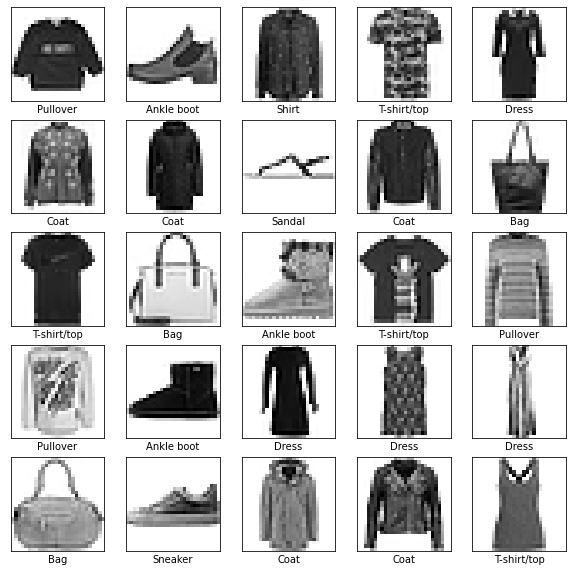

In [12]:
# display the first 25 images from the training set and 
# display the class name below each image
# verify that data is in correct format
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(df.drop('label', axis=1).values[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(clothing[df['label'][i]])

Training and validation and test set

In [15]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
X_test=df_test.iloc[:,1:]
y_test=df_test.iloc[:,0]
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=1000)

Normalization

In [16]:
x= X.astype("float32")/255
x_train = x_train.astype("float32")/255
x_val = x_val.astype("float32")/255
x_test = X_test.astype("float32")/255

In [108]:
meth=["SVC with rbf kernel","Decision Tree Classifier","ExtraTreeClassifier","GaussianNB","KNeighbors Classifier",
      "Logistic Regression","RandomForestClassifier","3-Layer Neural Network",
      "CNN"
     ]
acc=[]

Dimensionality Reduction using PCA

In [19]:
pca = PCA(n_components=200)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_val_pca= pca.transform(x_val)
x_test_pca=pca.transform(x_test)

Make training datasets array

In [76]:
x_train_arr = np.array(x_train, dtype = 'float32')
x_val_arr= np.array(x_val, dtype='float32')
x_test_arr=np.array(X_test, dtype='float32')
x_train_arr.shape,x_test_arr.shape

((54000, 784), (10000, 784))

In [77]:
image_shape = (28,28,1)
x_train_arr=x_train_arr.reshape(x_train_arr.shape[0],*image_shape)
x_val_arr=x_val_arr.reshape(x_val.shape[0],*image_shape)
x_test_arr=x_test_arr.reshape(X_test.shape[0],*image_shape)
x_train_arr.shape,x_test_arr.shape
y_test_cat = to_categorical(np.array(y_test))
y_val_cat=to_categorical(np.array(y_val))
y_train_cat = to_categorical(np.array(y_train))

In [47]:
def fun1(x_train_pca,y_train,x_val_pca,y_val,x_test_pca,y_test):
    svc = SVC(gamma='scale',kernel='rbf',C=1)
    svc.fit(x_train_pca,y_train)
    preds = svc.predict(x_val_pca)
    print(accuracy_score(preds,y_val)*100)
    pred=svc.predict(x_test_pca)
    ans=accuracy_score(y_test,pred)
    acc.append(ans)

In [48]:
def fun2(x_train_pca,y_train,x_val_pca,y_val,x_test_pca,y_test):
    classifier = DecisionTreeClassifier(criterion='gini')
    classifier.fit(x_train_pca,y_train)
    preds = classifier.predict(x_val_pca)
    print(accuracy_score(preds,y_val)*100)
    pred=classifier.predict(x_test_pca)
    ans=accuracy_score(y_test,pred)
    acc.append(ans)

In [32]:
DT(x_train_pca,y_train,x_val_pca,y_val,x_test_pca,y_test)

75.75
[0.7629, 0.7627, 0.7593, 0.7602, 0.7604]


In [49]:
def fun3(x_train_pca,y_train,x_val_pca,y_val,x_test_pca,y_test):
    model = ExtraTreesClassifier()
    model.fit(x_train_pca,y_train)
    preds = model.predict(x_val_pca)
    print(accuracy_score(preds,y_val)*100)
    pred=model.predict(x_test_pca)
    ans=accuracy_score(y_test,pred)
    acc.append(ans)

In [50]:
def fun4(x_train_pca,y_train,x_val_pca,y_val,x_test_pca,y_test):
    model = GaussianNB()
    model.fit(x_train_pca,y_train)
    preds = model.predict(x_val_pca)
    print(accuracy_score(preds,y_val)*100)
    pred=model.predict(x_test_pca)
    ans=accuracy_score(y_test,pred)
    acc.append(ans)

In [51]:
def fun5(x_train_pca,y_train,x_val_pca,y_val,x_test_pca,y_test):
    model = KNeighborsClassifier(n_neighbors=10)
    model.fit(x_train_pca,y_train)
    preds = model.predict(x_val_pca)
    print(accuracy_score(preds,y_val)*100)
    pred=model.predict(x_test_pca)
    ans=accuracy_score(y_test,pred)
    acc.append(ans)

In [52]:
def fun6(x_train_pca,y_train,x_val_pca,y_val,x_test_pca,y_test):
    model = LogisticRegression()
    model.fit(x_train_pca,y_train)
    preds = model.predict(x_val_pca)
    print(accuracy_score(preds,y_val)*100)
    pred=model.predict(x_test_pca)
    ans=accuracy_score(y_test,pred)
    acc.append(ans)

In [53]:
def fun7(x_train_pca,y_train,x_val_pca,y_val,x_test_pca,y_test):
    model = RandomForestClassifier()
    model.fit(x_train_pca,y_train)
    preds = model.predict(x_val_pca)
    print(accuracy_score(preds,y_val)*100)
    pred=model.predict(x_test_pca)
    ans=accuracy_score(y_test,pred)
    acc.append(ans)

In [81]:
def fun8(x_train_arr,y_train_cat,x_val_arr,y_val,x_test_arr,y_test_cat):
    model = keras.Sequential([
    keras.layers.Flatten(input_shape=image_shape),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    model.summary() 

    # Step 2 - Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(x_train_arr, y_train_cat, epochs=10, validation_data=(x_val_arr,y_val_cat),shuffle=True)
    test_loss, test_acc = model.evaluate(x_test_arr,y_test_cat)
    acc.append(test_acc)

In [117]:
def fun9(x_train_arr,y_train_cat,x_val_arr,y_val,x_test_arr,y_test_cat):
    cnn_model = keras.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    keras.layers.MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(), # flatten out the layers
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(10,activation = 'softmax')
    ])
    cnn_model.summary()
    cnn_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
    cnn_model.fit(
    x_train_arr,
    y_train_cat,
    epochs=20,
    verbose=1,
    validation_data=(x_val_arr,y_val_cat),
    )
    score = cnn_model.evaluate(x_test_arr, y_test_cat)
    acc.append(score[1])

In [103]:
# def fun10(x_train_arr,y_train_cat,x_val_arr,y_val,x_test_arr,y_test_cat):
#     num_classes = 10

#     model = keras.Sequential()

#     model.add(keras.layers.Conv2D(6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
#     model.add(keras.layers.AveragePooling2D())

#     model.add(keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu'))
#     model.add(keras.layers.AveragePooling2D())

#     model.add(keras.layers.Flatten())

#     model.add(keras.layers.Dense(120, activation='relu'))

#     model.add(keras.layers.Dense(84, activation='relu'))

#     model.add(keras.layers.Dense(num_classes, activation = 'softmax'))
#     model.compile(optimizer="adam",
#               loss="categorical_crossentropy",
#               metrics=["accuracy"])
#     model.summary()
#     model.fit(x_train_arr, y_train_cat,
#                     epochs=10,
#                     validation_data=(x_val_arr,y_val_cat))
#     score = model.evaluate(x_test_arr, y_test_cat, verbose=0)
#     acc.append(score[1])

In [82]:
# fun8(x_train_arr,y_train_cat,x_val_arr,y_val_cat,x_test_arr,y_test_cat)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.5088 - accuracy: 0.8206 - val_loss: 0.4292 - val_accuracy: 0.8482
Epoch 2/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3826 - accuracy: 0.8612 - val_loss: 0.3985 - val_accuracy: 0.8540
Epoch 3/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.3426 - accur

In [96]:
# fun9(x_train_arr,y_train_cat,x_val_arr,y_val_cat,x_test_arr,y_test_cat)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 32)                173088    
_________________________________________________________________
dense_25 (Dense)             (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_______________________________________________

In [97]:
# acc

[0.8693000078201294, 0.8543000221252441]

In [98]:
# acc.clear()

In [104]:
9# fun10(x_train_arr,y_train_cat,x_val_arr,y_val_cat,x_test_arr,y_test_cat)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d_2 (Average (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
average_pooling2d_3 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_30 (Dense)             (None, 84)              

In [120]:
acc.clear()
fun1(x_train_pca,y_train,x_val_pca,y_val,x_test_pca,y_test)
fun2(x_train_pca,y_train,x_val_pca,y_val,x_test_pca,y_test)
fun3(x_train_pca,y_train,x_val_pca,y_val,x_test_pca,y_test)
fun4(x_train_pca,y_train,x_val_pca,y_val,x_test_pca,y_test)
fun5(x_train_pca,y_train,x_val_pca,y_val,x_test_pca,y_test)
fun6(x_train_pca,y_train,x_val_pca,y_val,x_test_pca,y_test)
fun7(x_train_pca,y_train,x_val_pca,y_val,x_test_pca,y_test)
fun8(x_train_arr,y_train_cat,x_val_arr,y_val_cat,x_test_arr,y_test_cat)
fun9(x_train_arr,y_train_cat,x_val_arr,y_val_cat,x_test_arr,y_test_cat)



89.25
76.26666666666667
86.3
73.91666666666666
85.65


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


85.48333333333333
86.38333333333334
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_21 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_45 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1688/1688 [==============================] - 33s 17ms/step - loss: 0.5141 - accuracy: 0.8188 - val_loss: 0.4358 - val_accuracy: 0.8455
Epoch 2/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3911 - accuracy: 0.8595 - val_loss: 0.3759 - val_accuracy: 0.8693
Epoch 3/10
1688/1688 [=============================

In [121]:
acc

[0.8964,
 0.7616,
 0.8637,
 0.7445,
 0.8635,
 0.857,
 0.8638,
 0.8755000233650208,
 0.8210999965667725]

<BarContainer object of 9 artists>

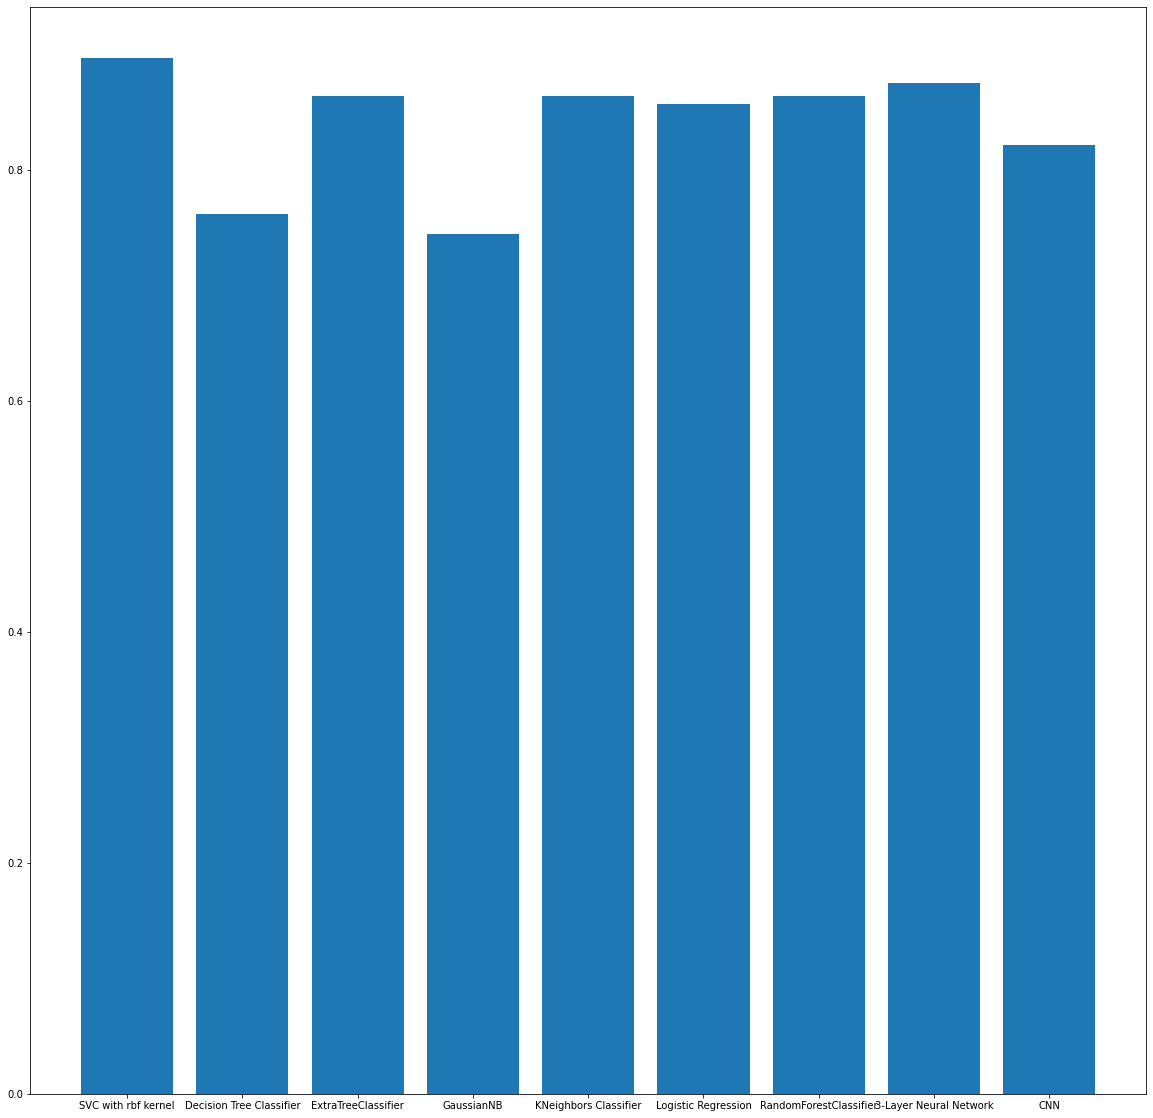

In [122]:
plt.figure(figsize=(20,20))
plt.bar(meth,acc)

Predicting using best classifier for random images

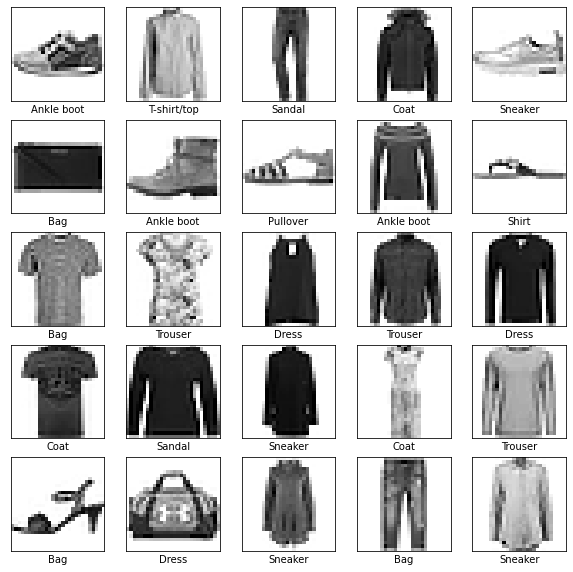

In [142]:
svc = SVC(gamma='scale',kernel='rbf',C=1)
svc.fit(x_train_pca,y_train)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    temp=random.choice(range(0,5000))
    plt.imshow(df.drop('label', axis=1).values[temp].reshape(28,28), cmap=plt.cm.binary)
    t=svc.predict([x_train_pca[temp]])
    plt.xlabel(clothing[t[0]])